In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Henry\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_da_india = df[(df['job_country'] == 'India') & (df['job_title_short'].isin(job_titles))].copy()

In [34]:
df_da_india = df_da_india.dropna(subset=['salary_year_avg'])

df_da_india['job_country'].value_counts()

job_country
India    355
Name: count, dtype: int64

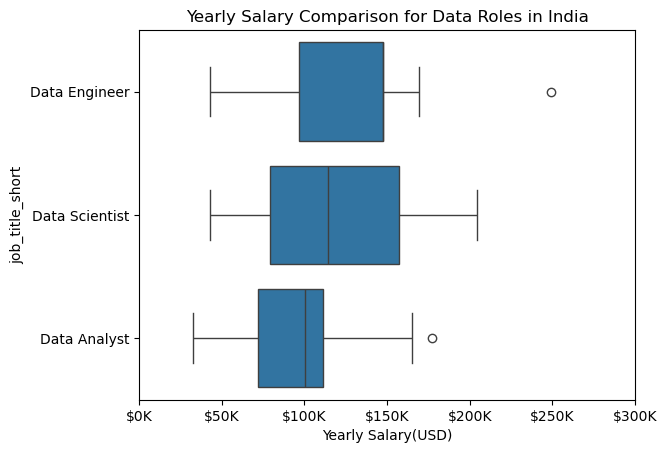

In [35]:
sns.boxplot(data=df_da_india, x='salary_year_avg', y='job_title_short')
plt.xlim(0, 300_000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.title('Yearly Salary Comparison for Data Roles in India')
plt.xlabel('Yearly Salary(USD)')
plt.show()